# 초음파 광물 예측 데이터

- 1988년 존스홉킨스대학교의 세즈노프스키 교수가 1986년 힌튼 교수(딥러닝의 아버지, 한층더 쌓으면 된다!)가 발표한 역전파 알고리즘에 관심을 갖고 은닉층과역전파의 효과를 실험하기 위해 정리한 데이터

- 광석화 일반 돌에 각각 음파 탐지기를 쏜 후 그 결과를 정리

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm 

# 결측치 탐지
import missingno as msno

In [2]:
df = pd.read_csv("./data/sonar.csv", header = None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
df[60].value_counts() # 종속변수확인

60
M    111
R     97
Name: count, dtype: int64

In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [6]:
df.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
56    float64
57    float64
58    float64
59    float64
60     object
Length: 61, dtype: object

In [7]:
# 종속변수를 변환해줘야함
# 원핫인코딩 해줌
df = pd.get_dummies(df, drop_first = True)

In [8]:
df["60_R"].value_counts() # 종속변수확인

60_R
False    111
True      97
Name: count, dtype: int64

- 단위가 좀 다른듯 싶으면서도... 같은 느낌인데...일단 0과 1사이의 값을 가진다

# 독립변수에 문제가 있다

In [9]:
x = df.drop(["60_R"], axis = 1)
y = df["60_R"]

In [39]:
model_sm = sm.Logit(y, x)
model_sm = model_sm.fit()
model_sm.summary()

Optimization terminated successfully.
         Current function value: 0.544405
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   60_R   No. Observations:                  208
Model:                          Logit   Df Residuals:                      199
Method:                           MLE   Df Model:                            8
Date:                Wed, 03 Dec 2025   Pseudo R-squ.:                  0.2120
Time:                        08:55:43   Log-Likelihood:                -113.24
converged:                       True   LL-Null:                       -143.70
Covariance Type:            nonrobust   LLR p-value:                 3.056e-10
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
2             -4.1031      7.222     -0.568      0.570     -18.257      10.051
3            -15.6573      6.543     -2.393      0.017     -28.482      -2.833
29            -4.4643      1.279     -3.492      0.000      -6.970      -1.958
30             8.9297      2.238      3.990      0.000       4.543      13.316
31            -4.9963      1.587     -3.148      0.002      -8.107      -1.886
34             0.1759      1.343      0.131      0.896      -2.456       2.808
35             3.6681      1.312      2.796      0.005       1.097       6.239
49           -31.0843     13.095     -2.374      0.018     -56.750      -5.419
54            20.1235     25.099      0.802      0.423     -29.069      69.317
==============================================================================
"""

In [11]:
# 일단 설정

In [12]:
# 종속변수 스케일링~~~
stay_index = df[df["60_R"] == 0].sample(97, random_state = 666).index.tolist() 
out_index = df[df["60_R"] == 1].index.tolist() 

random_index = stay_index + out_index


sample_x = x.iloc[random_index]
sample_y = df["60_R"][random_index]


In [13]:
x_train, x_test, y_train, y_test = train_test_split(
    sample_x,
    sample_y,
    test_size = 0.2,
    stratify=sample_y,
    random_state=666
)

ss = StandardScaler()
scaled_train = ss.fit_transform(x_train)
scaled_test = ss.transform(x_test)

In [14]:
x_train.shape

(155, 60)

In [15]:
# 입력층(60개의 독립변수가 있으니까)
inputs = keras.Input(shape = (60,))

# 은닉층(내마음)
dense1 = keras.layers.Dense(100, activation = "relu") 

# 출력층(M 또는 R  2개의 종속변수의 확률값이 필요하니까) 
dense2 = keras.layers.Dense(2, activation = "softmax")


model = keras.Sequential()
model.add(inputs)
model.add(dense1)
model.add(dense2)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │           6,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             202 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,302 (24.62 KB)

 Trainable params: 6,302 (24.62 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:

# 종속변수가 범주형이므로 categorical_crossentropy
model.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
history = model.fit(
    scaled_train, 
    y_train, 
    epochs= 50, 
    batch_size=32,
    validation_data = (scaled_test, y_test),
)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.5097 - loss: 0.8388 - val_accuracy: 0.7436 - val_loss: 0.5864
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6774 - loss: 0.6126 - val_accuracy: 0.7179 - val_loss: 0.5183
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7871 - loss: 0.4748 - val_accuracy: 0.7436 - val_loss: 0.4818
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8065 - loss: 0.4257 - val_accuracy: 0.7436 - val_loss: 0.4657
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8323 - loss: 0.3845 - val_accuracy: 0.7436 - val_loss: 0.4529
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8516 - loss: 0.3469 - val_accuracy: 0.7692 - val_loss: 0.4388
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8581 - loss: 0.3147 - val_accuracy: 0.7692 - val_loss: 0.4232
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8839 - loss: 0.2878 - val_accuracy: 0.7436 - val_loss: 0.4101


# 일반화 성능 보기

In [17]:
model.evaluate(scaled_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7949 - loss: 0.4282


[0.42821305990219116, 0.7948718070983887]

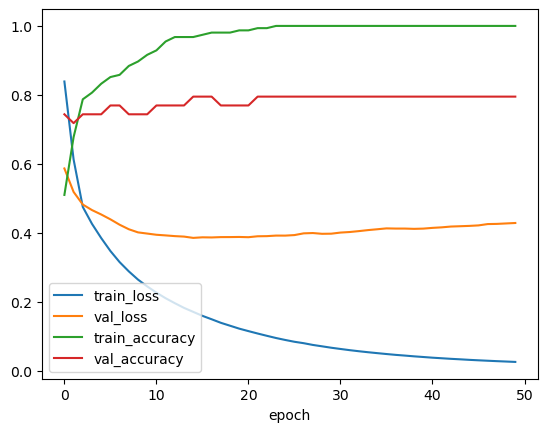

In [18]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")

plt.plot(history.history["accuracy"], label = "train_accuracy")
plt.plot(history.history["val_accuracy"], label = "val_accuracy")

plt.legend()
plt.xlabel("epoch")
plt.show()

- 과대적합 방지해야겠져~~

# 드롭아웃 적용

In [19]:
# 입력층(60개의 독립변수가 있으니까)
inputs = keras.Input(shape = (60,))

# 은닉층(내마음)
dense1 = keras.layers.Dense(30, activation = "relu") 

# 출력층(M 또는 R  2개의 종속변수의 확률값이 필요하니까) 
dense2 = keras.layers.Dense(2, activation = "softmax")

# 드롭아웃
dropout = keras.layers.Dropout(0.3)

model_2 = keras.Sequential()
model_2.add(inputs)
model_2.add(dense1)
model_2.add(dropout) # 드롭아웃 적용~~
model_2.add(dense2)


model_2.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
history2 = model.fit(
    scaled_train, 
    y_train, 
    epochs= 200, 
    batch_size=4,
    validation_data = (scaled_test, y_test),
)

Epoch 1/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0254 - val_accuracy: 0.7949 - val_loss: 0.4509
Epoch 2/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0193 - val_accuracy: 0.7949 - val_loss: 0.4603
Epoch 3/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0144 - val_accuracy: 0.7692 - val_loss: 0.4590
Epoch 4/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0110 - val_accuracy: 0.8205 - val_loss: 0.4744
Epoch 5/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0091 - val_accuracy: 0.8205 - val_loss: 0.4968
Epoch 6/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0074 - val_accuracy: 0.8462 - val_loss: 0.4789
Epoch 7/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0065 - val_accuracy: 0.8205 - val_loss: 0.5081
Epoch 8/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0055 - val_accuracy: 0.8205 - v

In [20]:
# 일반화 성능
model_2.evaluate(scaled_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5128 - loss: 0.7550 


[0.7550357580184937, 0.5128205418586731]

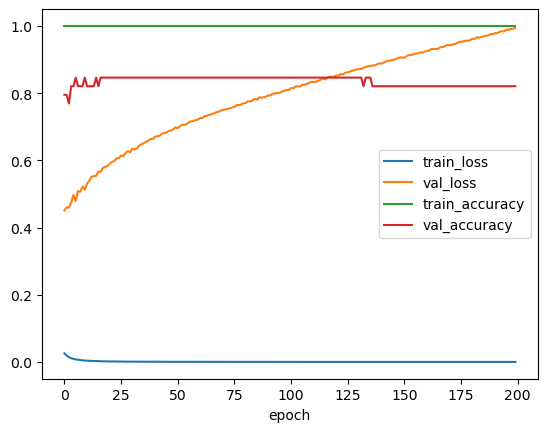

In [21]:
# Dropout 적용
plt.figure()

plt.plot(history2.history["loss"], label = "train_loss")
plt.plot(history2.history["val_loss"], label = "val_loss")

plt.plot(history2.history["accuracy"], label = "train_accuracy")
plt.plot(history2.history["val_accuracy"], label = "val_accuracy")

plt.legend()
plt.xlabel("epoch")
plt.show()

## 슬픈 결과... 거의 뭐 갔습니다

# 독립변수 재설정

In [22]:
x = df[[2,3,29,30,31,34,35,49,54]]
y = df["60_R"]

In [23]:
# 종속변수 스케일링~~~
stay_index = df[df["60_R"] == 0].sample(97, random_state = 666).index.tolist() 
out_index = df[df["60_R"] == 1].index.tolist() 

random_index = stay_index + out_index


sample_x = x.iloc[random_index]
sample_y = df["60_R"][random_index]

In [24]:
x_train, x_test, y_train, y_test = train_test_split(
    sample_x,
    sample_y,
    test_size = 0.2,
    stratify=sample_y,
    random_state=666
)

ss = StandardScaler()
scaled_train = ss.fit_transform(x_train)
scaled_test = ss.transform(x_test)

In [25]:
x_train.shape

(155, 9)

In [26]:
# 입력층(60개의 독립변수가 있으니까)
inputs = keras.Input(shape = (9,))

# 은닉층(내마음)
dense1 = keras.layers.Dense(100, activation = "relu") 

# 출력층(M 또는 R  2개의 종속변수의 확률값이 필요하니까) 
dense2 = keras.layers.Dense(2, activation = "softmax")

dropout = keras.layers.Dropout(0.3)

model3 = keras.Sequential()
model3.add(inputs)
model3.add(dense1)
model3.add(dropout)
model3.add(dense2)

model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 100)                 │           1,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             202 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,202 (4.70 KB)

 Trainable params: 1,202 (4.70 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# 얼리얼리 해버리기
es_cb = keras.callbacks.EarlyStopping(
    patience= 2, # 인내심, 몇 에포크를 지켜볼것인가
    restore_best_weights=True 
)

In [28]:
# 종속변수가 범주형이므로 categorical_crossentropy
model3.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
history3 = model3.fit(
    scaled_train, 
    y_train, 
    epochs= 200, 
    batch_size=8,
    validation_data = (scaled_test, y_test),
    callbacks =[es_cb],
)

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5161 - loss: 0.7620 - val_accuracy: 0.4872 - val_loss: 0.7498
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5548 - loss: 0.7109 - val_accuracy: 0.6410 - val_loss: 0.6627
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6323 - loss: 0.6771 - val_accuracy: 0.6154 - val_loss: 0.6239
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6581 - loss: 0.6106 - val_accuracy: 0.6667 - val_loss: 0.6082
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6581 - loss: 0.6220 - val_accuracy: 0.7436 - val_loss: 0.5966
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6710 - loss: 0.6023 - val_accuracy: 0.7436 - val_loss: 0.5802
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7226 - loss: 0.5616 - val_accuracy: 0.7179 - val_loss: 0.5684
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6839 - loss: 0.5675 - val_accuracy: 0.7179 - 

In [29]:
model3.evaluate(scaled_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8205 - loss: 0.4436


[0.44363832473754883, 0.8205128312110901]

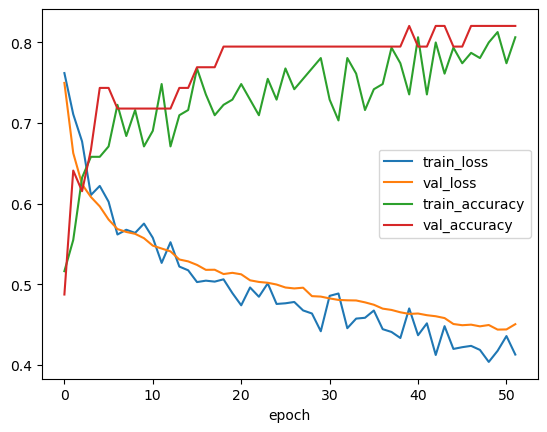

In [30]:
plt.figure()

plt.plot(history3.history["loss"], label = "train_loss")
plt.plot(history3.history["val_loss"], label = "val_loss")

plt.plot(history3.history["accuracy"], label = "train_accuracy")
plt.plot(history3.history["val_accuracy"], label = "val_accuracy")

plt.legend()
plt.xlabel("epoch")
plt.show()

# 한 것
- 종속변수 스케일링함
- dropout 적용함
- 얼리스탑 적용함
- 유의성 없는 독립변수 싹 삭제함

- es_cb.stopped_epoch => 41

- 40 이 딱 좋은~~~

In [31]:
val_labels = np.argmax(model3.predict(scaled_test), axis =-1)

print("예측값", val_labels)
print("정답값", y_test.values)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
예측값 [0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1
 1 1]
정답값 [False False  True False  True False False  True False  True  True  True
 False False  True False  True False False  True False False False  True
  True  True  True False False  True  True False  True False False  True
 False  True  True]


In [32]:
# 정확도 계산
np.mean(val_labels == y_test.values)

np.float64(0.8205128205128205)

# train_test_split 두번 나눌것입니다~~

In [53]:
x = df[[3,29,30,31,34,35,49]]
y = df["60_R"]

# 종속변수 스케일링~~~
stay_index = df[df["60_R"] == 0].sample(97, random_state = 666).index.tolist() 
out_index = df[df["60_R"] == 1].index.tolist() 

random_index = stay_index + out_index

sample_x = x.iloc[random_index]
sample_y = df["60_R"][random_index]


x_train, x_test, y_train, y_test = train_test_split(
    sample_x,
    sample_y,
    test_size = 0.2,
    stratify=sample_y,
    random_state=666
)

ss = StandardScaler()
scaled_train = ss.fit_transform(x_train)
scaled_test = ss.transform(x_test)

In [54]:
# 입력층(60개의 독립변수가 있으니까)
inputs = keras.Input(shape = (7,))

# 은닉층(내마음)
dense1 = keras.layers.Dense(100, activation = "relu") 

# 출력층(M 또는 R  2개의 종속변수의 확률값이 필요하니까) 
dense2 = keras.layers.Dense(2, activation = "softmax")

dropout = keras.layers.Dropout(0.3)

model4 = keras.Sequential()
model4.add(inputs)
model4.add(dense1)
model4.add(dropout)
model4.add(dense2)

model4.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 100)                 │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 2)                   │             202 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,002 (3.91 KB)

 Trainable params: 1,002 (3.91 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
# 얼리얼리 해버리기
es_cb = keras.callbacks.EarlyStopping(
    patience= 2, # 인내심, 몇 에포크를 지켜볼것인가
    restore_best_weights=True 
)


# 종속변수가 범주형이므로 categorical_crossentropy
model4.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
history4 = model4.fit(
    scaled_train, 
    y_train, 
    epochs= 200, 
    batch_size= 4,
    validation_data = (scaled_test, y_test),
    callbacks =[es_cb],
)

Epoch 1/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5871 - loss: 0.6992 - val_accuracy: 0.4872 - val_loss: 0.7029
Epoch 2/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6516 - loss: 0.6394 - val_accuracy: 0.5897 - val_loss: 0.6623
Epoch 3/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6258 - loss: 0.6236 - val_accuracy: 0.6154 - val_loss: 0.6400
Epoch 4/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6581 - loss: 0.5994 - val_accuracy: 0.5897 - val_loss: 0.6212
Epoch 5/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7161 - loss: 0.5688 - val_accuracy: 0.6667 - val_loss: 0.5976
Epoch 6/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6452 - loss: 0.5661 - val_accuracy: 0.6667 - val_loss: 0.5893
Epoch 7/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6839 - loss: 0.5548 - val_accuracy: 0.6923 - val_loss: 0.5721
Epoch 8/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6452 - loss: 0.5706 - val_accuracy: 0.6923 - v

In [56]:
model4.evaluate(x_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7179 - loss: 0.6370


[0.6370088458061218, 0.7179487347602844]

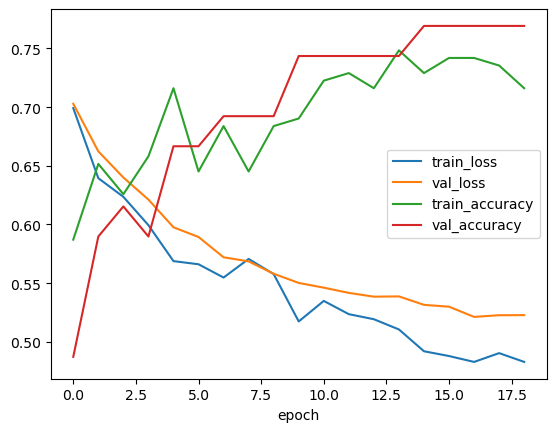

In [57]:
plt.figure()

plt.plot(history4.history["loss"], label = "train_loss")
plt.plot(history4.history["val_loss"], label = "val_loss")

plt.plot(history4.history["accuracy"], label = "train_accuracy")
plt.plot(history4.history["val_accuracy"], label = "val_accuracy")

plt.legend()
plt.xlabel("epoch")
plt.show()

- 맘에 걸리는것은... 독립변수 뺄때 좀 이상한 기준으로 뺏다는 것이다...
- 이것은 분류 모델인데 다중공선성을 왜 체크하니!@!!!!!!!
- 그래도 함 해봤다...

In [58]:
val_labels2 = np.argmax(model4.predict(scaled_test), axis =-1)

print("예측값", val_labels2)
print("정답값", y_test.values)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
예측값 [0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1
 0 1]
정답값 [False False  True False  True False False  True False  True  True  True
 False False  True False  True False False  True False False False  True
  True  True  True False False  True  True False  True False False  True
 False  True  True]


In [60]:
model_sm = sm.Logit(y, x)
model_sm = model_sm.fit()
model_sm.summary()

Optimization terminated successfully.
         Current function value: 0.546386
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   60_R   No. Observations:                  208
Model:                          Logit   Df Residuals:                      201
Method:                           MLE   Df Model:                            6
Date:                Wed, 03 Dec 2025   Pseudo R-squ.:                  0.2091
Time:                        09:01:15   Log-Likelihood:                -113.65
converged:                       True   LL-Null:                       -143.70
Covariance Type:            nonrobust   LLR p-value:                 4.276e-11
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
3            -16.6761      4.498     -3.707      0.000     -25.493      -7.859
29            -4.3042      1.260     -3.417      0.001      -6.773      -1.835
30             8.6653      2.207      3.927      0.000       4.340      12.991
31            -4.8883      1.583     -3.088      0.002      -7.991      -1.786
34             0.3011      1.336      0.225      0.822      -2.317       2.919
35             3.5667      1.307      2.730      0.006       1.006       6.127
49           -28.8659     12.533     -2.303      0.021     -53.430      -4.302
==============================================================================
"""